# This notebook shows implementation of k nearest neighbor predictor on synthetic data 

In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
np.random.seed(42)

### Generate random 2-D data

In [32]:
n = 100 #data points

Y = np.random.randn(n)
X1 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/2))
X2 = np.random.normal(loc=3.0, scale=1.0, size=int(n/2))
X = np.concatenate((X1, X2), axis=0)

In [30]:
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [29]:
dt = pd.DataFrame({'X':X, 'Y':Y}, columns=['X', 'Y'])
dt.head()

,X,Y
0,-2.073822,-1.594428
1,-1.090583,-0.599375
2,-4.398568,0.005244
3,-2.437031,0.046981
4,-3.650643,-0.450065


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(dt,labels, test_size=0.2, random_state=0)

### Run some predictions

In [22]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
pred_results = model.predict(X_test)

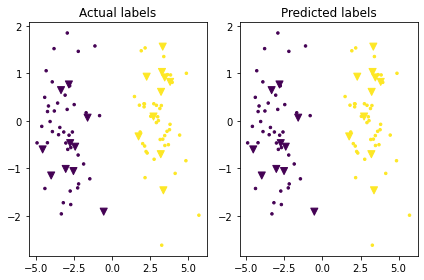

In [24]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=pred_results, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()